In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
import pandas as pd
import seaborn as sn

In [74]:

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [75]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


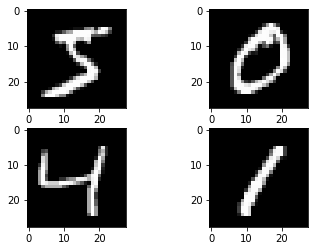

In [76]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [77]:
X_train.shape[1]

28

In [78]:
X_test.shape

(10000, 28, 28)

In [79]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [80]:
X_train.shape

(60000, 784)

In [81]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X_train)
print(standardized_data.shape)



(60000, 784)


In [89]:
X_train.shape

(60000, 784)

In [86]:
np.mean(standardized_data),np.std(standardized_data)

(7.5645185e-10, 0.9563164)

In [90]:
feat_cols = ['feature'+str(i) for i in range(X_train.shape[1])]

In [92]:
normalised_x_train = pd.DataFrame(X_train,columns=feat_cols)

In [93]:
normalised_x_train.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalComponents = pca_data.fit_transform(X_train)

In [95]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [97]:
principal_Df.head(15)

,principal component 1,principal component 2
0,123.929253,-312.664154
1,1011.717896,-294.853333
2,-51.851383,392.166351
3,-799.123779,-607.187805
4,-382.755341,730.540833
5,184.467377,221.326248
6,-726.513123,-156.985718
7,513.344238,-310.769531
8,-868.907654,-81.555313
9,-304.733582,465.583344


In [98]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))



Explained variation per principal component: [0.0970481  0.07096021]


In [101]:
pca_df

,1st_principal,2nd_principal,label
0,123.929253,-312.664154,5.0
1,1011.717896,-294.853333,0.0
2,-51.851383,392.166351,4.0
3,-799.123779,-607.187805,1.0
4,-382.755341,730.540833,9.0
...,...,...,...
59995,-99.619728,-293.483704,8.0
59996,152.758469,-687.895691,3.0
59997,-178.051987,160.084946,5.0
59998,130.603729,-5.596647,6.0


/Users/amimalli/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


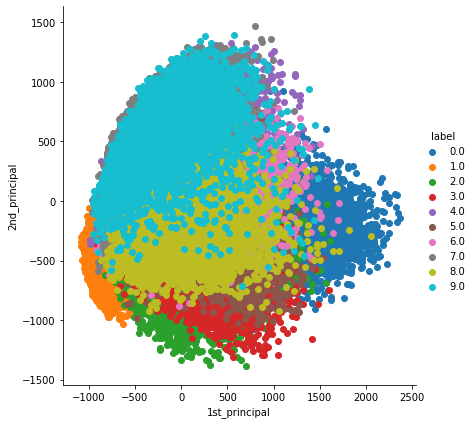

In [100]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((principalComponents.T, y_train)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

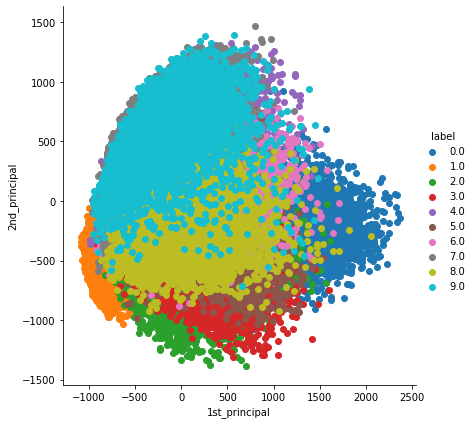

In [132]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((principalComponents.T, y_train)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
g=sn.FacetGrid(pca_df, hue="label", height=6)
g.map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [59]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()



In [60]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)




shape of pca_reduced.shape =  (60000, 2)


/Users/amimalli/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


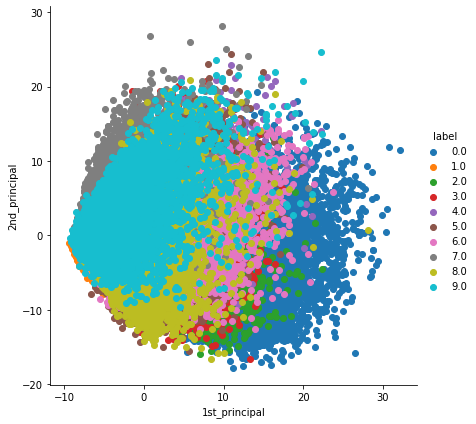

In [61]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y_train)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

(60000, 1)

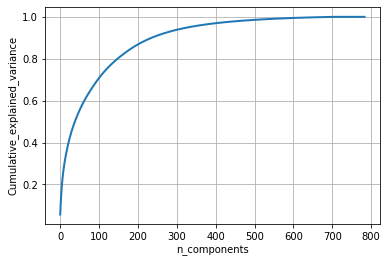

In [47]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, appro

In [ ]:
y

In [ ]:
### using TSNE

In [107]:
from sklearn.manifold import TSNE

In [110]:
standardized_data.shape

(60000, 784)

In [123]:
model = TSNE(n_components=2, random_state=0, perplexity=50)

In [124]:
data_1000 = standardized_data[0:40000,:]
labels_1000 = y_train[0:40000]

In [125]:
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)




In [126]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T





In [127]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))




/Users/amimalli/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


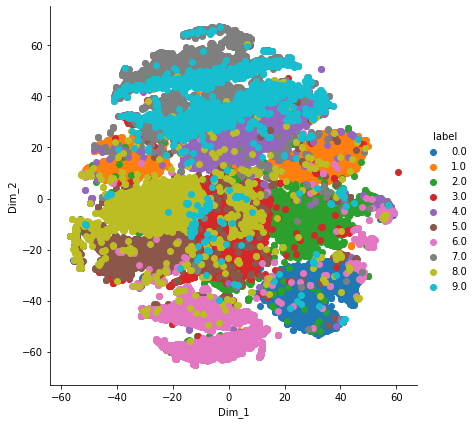

In [128]:

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [129]:
import plotly.express as px

In [1]:
fig = px.scatter( tsne_df,x='Dim_1', y='Dim_2',color='label',hover_data=['label'],color_continuous_scale="rainbow_r")
fig.show()

NameError: name 'px' is not defined